## Prueba de  Modelos supervisados
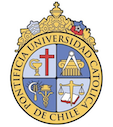

#### Pontificia Universidad Católica de Chile
Diplomado en Data Science

Septiembre 2021


### Nombre:
Pablo Opazo 
Mario Guajardo


Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (`2009_1perc.csv` y `2010_1perc.csv`) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.

- La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

# 1.- Enliste todas las librerias que utilizará (0.5 puntos)
Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [2]:
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import datetime

# 2.- Importación y revisión de los datos (1 punto)

Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración *básica* de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [36]:
df1 = pd.read_csv("2009_1perc.csv")
df2 = pd.read_csv("2010_1perc.csv")
df1.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


In [33]:
df_consolidado = df1.append(df2)
df_consolidado

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,449178,2010,60,7062,9262010,45,1,O,H,2.0,...,,60,I,,,989382,155162,CM,1,20
6009,362162,2010,75,15797,7302010,10,A,O,P,1.0,...,,75,A,,,1012757,186018,CM,1,85
6010,208893,2010,123,830,4302010,1630,A,O,P,3.0,...,,123,E,,,933868,138600,CM,1,46
6011,551820,2010,115,13122,11232010,2100,1,O,P,1.0,...,,115,E,,,1014722,214388,CM,1,85


# 3.- Preprocesamiento de datos (1 punto)
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

In [74]:
df_consolidado.describe()

lista = ('inout','trhsloc','typeofid','explnstp','othpers','arstmade','sumissue','offunif','officrid','frisked','searched','contrabn','adtlrept','pistol','riflshot','asltweap','knifcuti','machgun','othrweap','pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other','radio','ac_rept','ac_inves','rf_vcrim','rf_othsw','ac_proxm','rf_attir','cs_objcs','cs_descr','cs_casng','cs_lkout','rf_vcact','cs_cloth','cs_drgtr','ac_evasv','ac_assoc','cs_furtv','rf_rfcmp','ac_cgdir','rf_verbl','cs_vcrim','cs_bulge','cs_other','ac_incid','ac_time','rf_knowl','ac_stsnd','ac_other','sb_hdobj','sb_outln','sb_admis','sb_other','rf_furt','rf_bulg','offverb','offshld', 'forceuse','sex','race','haircolr','eyecolor','build')
categorical_columns = pd.DataFrame({},columns= lista)
for elemento in lista:
    if elemento != 'forceuse':
        categorical_columns[elemento]  = df_consolidado[elemento]

categorical_columns[categorical_columns.columns] = categorical_columns[categorical_columns.columns].astype('category')
categorical_columns.dtypes

inout       category
trhsloc     category
typeofid    category
explnstp    category
othpers     category
              ...   
sex         category
race        category
haircolr    category
eyecolor    category
build       category
Length: 70, dtype: object

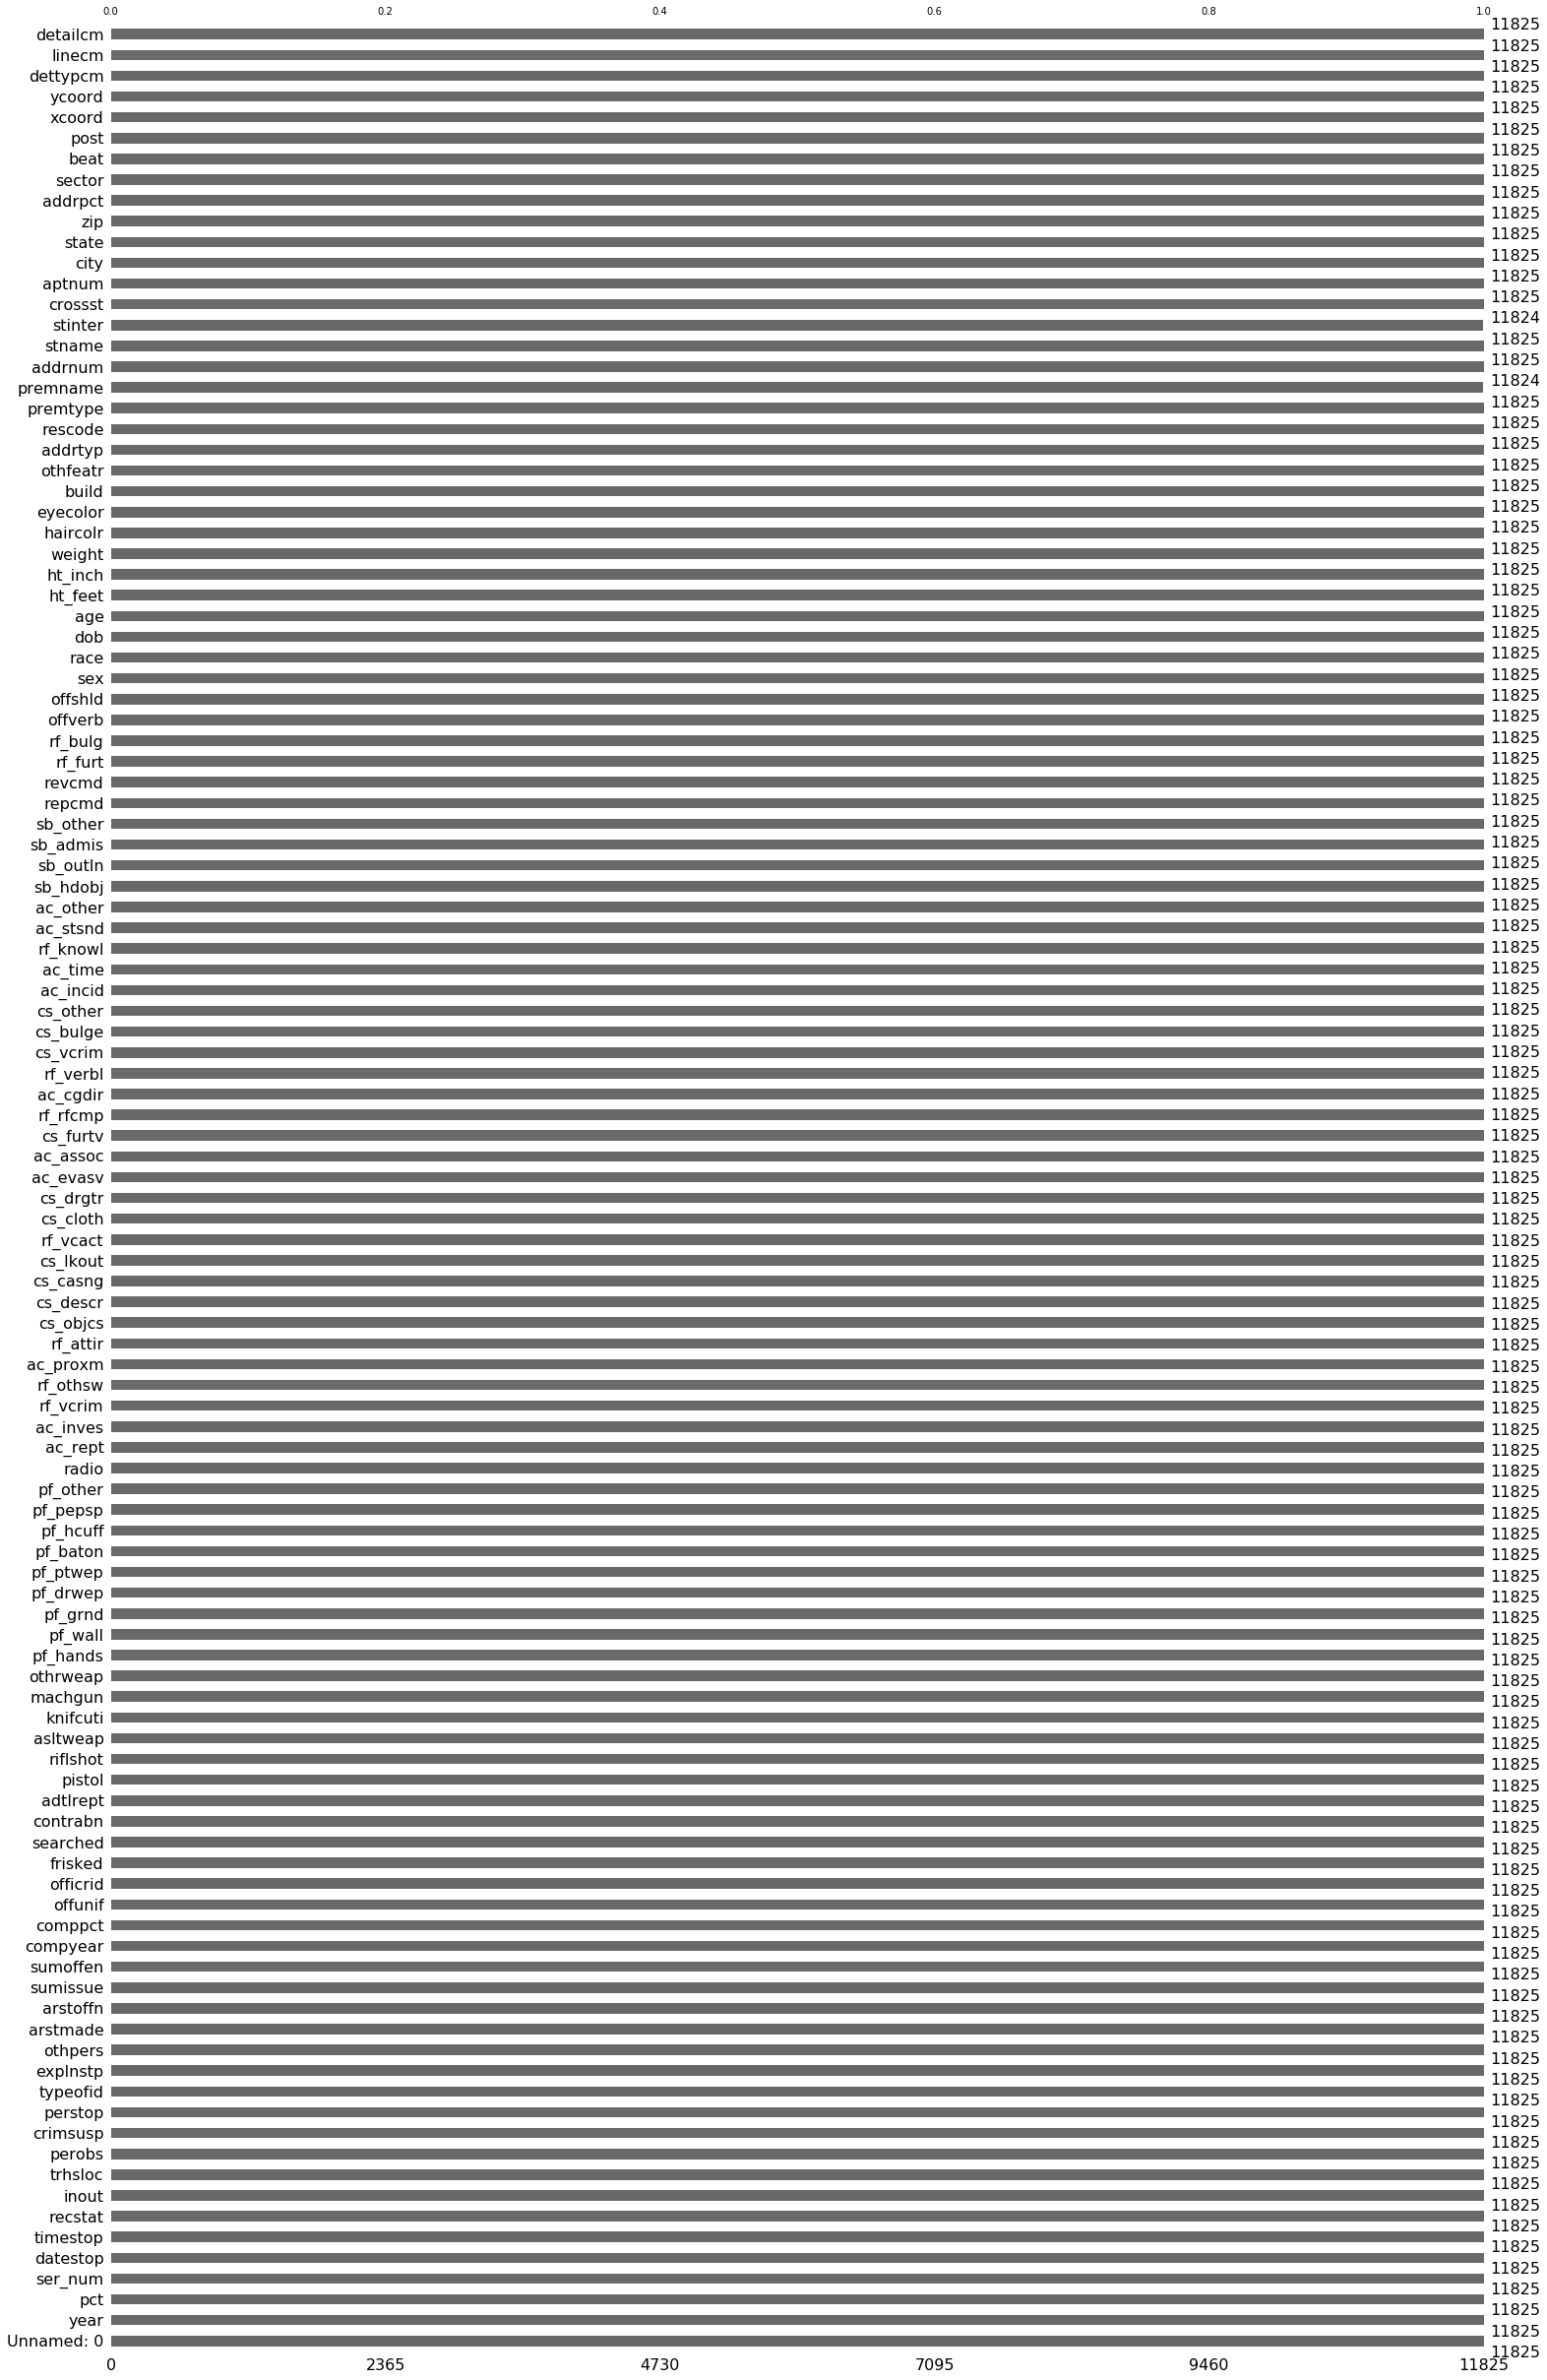

In [4]:
# gráficos para ver datos vacíos
msno.bar(df_consolidado)

- 3.2 Reemplaze las siguientes clases faltantes:

  -Si alguna categoría de las columnas officrid,  o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'
  
  -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor
  
Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [5]:
df_test = df_consolidado
df_test['officrid'] = df_test['officrid'].str.replace(' ','N', regex = True)
df_test['offshld'] = df_test['offshld'].str.replace(' ','N', regex = True)
df_test['offverb'] = df_test['offverb'].str.replace(' ','N', regex = True)

df_test['beat'] = df_test['beat'].str.replace(' ','U', regex = True)
df_test['beat']

0        7
1        U
2        U
3        4
4        U
        ..
6008     U
6009     U
6010     U
6011     U
6012    11
Name: beat, Length: 11825, dtype: object

- 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [6]:
def transform(feet, inch):
    return (feet *  0.3048 + inch *0.0254)

df_test['ht_feet.ht_inch'] = df_test.apply(lambda x : transform( x['ht_feet'], x['ht_inch']), axis=1)
df_test['ht_feet.ht_inch']

0       1.7526
1       1.6510
2       1.9050
3       1.6510
4       1.6764
         ...  
6008    1.7780
6009    1.7018
6010    1.8288
6011    1.8034
6012    1.8542
Name: ht_feet.ht_inch, Length: 11825, dtype: float64

- 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.

Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/ 

In [7]:
df_consolidado['fecha'] = pd.to_datetime(df_consolidado['datestop'], format= '%m%d%Y')
df_consolidado['month'] = pd.DatetimeIndex(df_consolidado['fecha']).month
df_consolidado['month'].head()

0     4
1    10
2    10
3    12
4    12
Name: month, dtype: int64

 - 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

# 4.- Análisis exploratorio (1 punto)

- 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

(array([11077.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   748.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

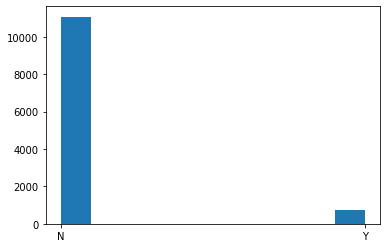

In [60]:
df_test['arstmade']
plt.hist(df_test['arstmade'])

RESPUESTA: Podemos ver que la variable está "cargada" hacia el evento negativo por lo que podemos deducir queen la mayor cantidad de los datos controlados no se realizó un arresto 

- 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

(array([6331.,  364., 2922.,    0., 1118.,  289.,    0.,  671.,   78.,
          52.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

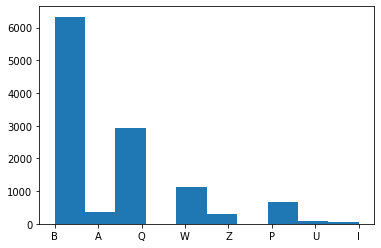

In [35]:
plt.hist(df_consolidado['race'])

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.

- 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

- 4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

# 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta. (0.5 puntos)

Los atributos que tienen el prefijo pf (`['pf_hands'],['pf_wall'], ['pf_grnd'], ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']`) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'. 

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

# 6.- Modelación (2 puntos)

- 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test  utilizando el año 2009 para entrenar, y el año 2010 para testear. (0.5 pts)

- 6.2  Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno). (1.5 pts)

# Bonus (0.5 pts)

¿Que puede hacer para mejorar la predicción de los modelos?